In [1]:
import numpy             as np
import scipy.ndimage     as ndimage
import matplotlib.pyplot as plt
import cartopy.crs       as ccrs
import cartopy           as cartopy 
import h5py              as h5py
import copy              as copy
from skimage    import measure as skmeasure
from matplotlib import colors  as mcolors

In [3]:
#=== Read precipitation data
file                      = "datafiles/3B-HHR.MS.MRG.3IMERG.20200428-S230000-E232959.1380.V06B.HDF5"
lat                       = np.arange(-90,90,0.1)   + 0.05
lon                       = np.arange(-180,180,0.1) + 0.05
lonmesh,latmesh           = np.meshgrid(lon,lat)
print(lat)
print(lon)
#Define the lat and lon domain for the USA
domain_latN               = 50; 
domain_latS               = 25; 
domain_lonW               = -130; 
domain_lonE               = -55;

#Find the array index to subset data to USA domain
domain_idxS               = np.min(np.argwhere(lat >= domain_latS))
domain_idxN               = np.max(np.argwhere(lat <= domain_latN))
domain_idxW               = np.min(np.argwhere(lon >= domain_lonW))
domain_idxE               = np.max(np.argwhere(lon <= domain_lonE))

try:
		#read data from HDF5
		ifhdl             = h5py.File(file,"r")
		precip            = ifhdl["/Grid/precipitationCal"]
		precip            = np.array(precip)
		precip            = np.transpose(np.squeeze(precip))
		print("Shape of precip data    : " + str(np.shape(precip)))
		
		#subset data
		precip_usa        = precip [domain_idxS:domain_idxN+1, domain_idxW:domain_idxE+1]
		lonmesh_usa       = lonmesh[domain_idxS:domain_idxN+1, domain_idxW:domain_idxE+1]  
		latmesh_usa       = latmesh[domain_idxS:domain_idxN+1, domain_idxW:domain_idxE+1]  
		
		print("Shape of precip_usa data: " + str(np.shape(precip_usa)))
		
finally:        
	ifhdl.close()


[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
Shape of precip data    : (1800, 3600)
Shape of precip_usa data: (250, 750)


In [10]:
#=== Smooth the data
filter_type                = "mean"
filter_width               = 5 #test

if filter_type             == "mean":
	precip_usa             = ndimage.uniform_filter(precip_usa,size = filter_width)
elif filter_type           == "median":
	precip_usa             = ndimage.median_filter(precip_usa,size = filter_width)
elif filter_type           == "gaussian":
	fsigma                 = int(filter_width/2.0)
	precip                 = ndimage.gaussian_filter(precip_usa, sigma= fsigma, truncate=2.0)


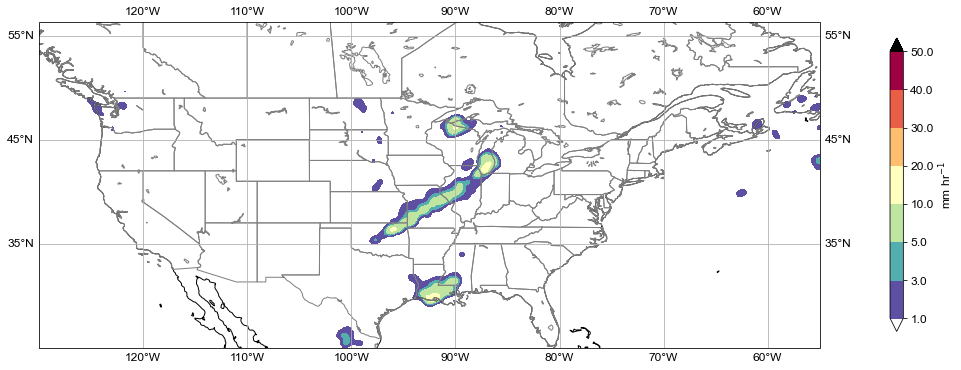

In [11]:
#=== Plot the precipitation data over the USA
#Config for the plot
figHeight                  = 6 #inches
figWidth                   = figHeight/np.abs(domain_latS-domain_latN) * np.abs(domain_lonE-domain_lonW) 
font_size                  = 12
latLabelWidth              = 10
lonLabelWidth              = 10
plt.rcParams["font.family"]= "Arial"; 
plt.rcParams["font.size"]  = font_size;

#lat and lon tick labels
latLabels                  = np.arange(domain_latS,domain_latN + latLabelWidth,latLabelWidth)
lonLabels                  = np.arange(domain_lonW,domain_lonE + lonLabelWidth,lonLabelWidth)


fig                        = plt.figure();
fig.set_size_inches(figWidth,figHeight);
fig.patch.set_color("w")
ax                         = plt.axes(projection = cartopy.crs.PlateCarree());
ax.set_extent( (domain_lonW,domain_lonE, domain_latS,domain_latN) )
ax.add_feature(cartopy.feature.COASTLINE,edgecolor="black", linewidth=1.0);
ax.add_feature(cartopy.feature.LAKES, edgecolor="gray", facecolor="none", linewidth=1.0)
ax.add_feature(cartopy.feature.STATES,edgecolor="gray", facecolor="none", linewidth=1.0)
gl = ax.gridlines(draw_labels=True,xlocs = lonLabels , ylocs = latLabels);
plt.minorticks_on();

contour_lvls                = np.concatenate(([1,3,5],np.arange(10,51,10)))
contour_cmap                = copy.copy(plt.cm.Spectral_r)
contour_cmap.set_under("w")
contour_cmap.set_over("k")
contour_norm                = mcolors.BoundaryNorm(contour_lvls, contour_cmap.N)

cb = ax.contourf(lonmesh_usa,latmesh_usa,precip_usa,contour_lvls,cmap=contour_cmap,norm = contour_norm,\
				extend = "both")
plt.colorbar(cb,ticks=contour_lvls,format = "%.1f", label = "mm hr$^{-1}$", 
						 shrink = 0.90, orientation="vertical", aspect = 20, pad = 0.07)


Shape of img_binary :(250, 750)
[[ 0  0  0  0  0  0  0  0  0  0  0 23 23 23 23 23 23 23 23 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23 23 23 23 23 23 23 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23 23 23 23 23 23 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 23 23 23 23 23 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 26 26 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 26 26 26 26 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 26 26 26 26 26 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 26 26 26 26 26 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 26 26 26 26 26 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [26 26 26 26 26 26  0  0  0  0  0  0  0  0  0 27 27  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 

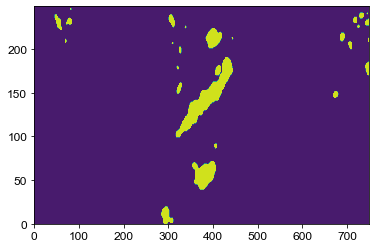

In [18]:
#=== Closed contours of precipitation as blobs

precip_min                   = 1 #closed contour of 1 mm/hr as a blob        
img_binary                   = (precip_usa >= precip_min)
print("Shape of img_binary :" + str(np.shape(img_binary)))

#Visualize blobs
plt.contourf(img_binary)

img_binary                   = img_binary.astype(np.uint16)
[img_label,n_objs]           = ndimage.label(img_binary)
print(img_label[-20:,-20:])
print("Shape of img_label  :" + str(np.shape(img_label)))
print("Number of blobs/objs:" + str(n_objs))

#Get obj ids
obj_ids                      = np.unique(img_label)
print("unique ids in the img_label:" + str(obj_ids))
#remove id = 0
obj_ids                      = obj_ids[obj_ids>0] 

In [21]:
#=== Analyze the blob properties (actually they are storm system)

#Get simple props
pixel_count         = ndimage.labeled_comprehension(precip_usa,img_label,obj_ids,np.count_nonzero,np.uint16,0)
area                = pixel_count * 110.0 #each pixel is approx. 100 km^2
print("shape of area:" + str(np.shape(area)))
print("area       :" + str(area))

#Properties using precip data inside blob
precip_sum          = ndimage.labeled_comprehension(precip_usa,img_label,obj_ids,np.sum,np.double,0)
precip_vol          = precip_sum * 110.0               
print("precip_vol :" + str(precip_vol))

precip_max          = ndimage.labeled_comprehension(precip_usa,img_label,obj_ids,np.max,np.float32,0)
print("precip_max :" + str(precip_max))     

#Using other geospatial data that coexists with precipitation in space and time.
#e.g wind data, temperature, elevation at same lat,lon grid as precip_usa
# I don't have such data so I will use lat and lon information to get more sophisticated details
# about storm systems

lat_min             = ndimage.labeled_comprehension(latmesh_usa,img_label,obj_ids,np.min,np.float32,-999)
lat_max             = ndimage.labeled_comprehension(latmesh_usa,img_label,obj_ids,np.max,np.float32,-999)
lon_min             = ndimage.labeled_comprehension(lonmesh_usa,img_label,obj_ids,np.min,np.float32,-999)
lon_max             = ndimage.labeled_comprehension(lonmesh_usa,img_label,obj_ids,np.max,np.float32,-999)
lat_width           = np.abs(lat_max - lat_min)
lon_width           = np.abs(lon_max - lon_min)
print("lat-width   :" + str(lat_width))
print("lon-width   :" + str(lon_width))

centroid_lat        = ndimage.labeled_comprehension(latmesh_usa,img_label,obj_ids,np.mean,np.float32,-999)
centroid_lon        = ndimage.labeled_comprehension(lonmesh_usa,img_label,obj_ids,np.mean,np.float32,-999)
print("centroid_lat:" + str(centroid_lat))
print("centroid_lon:" + str(centroid_lon))

#using custom function to compute percentile of rain rates within each storm/blob
def precip_pctl(val):
	pctls     = np.array([10,25,50,75,90])
	pctl_val  = np.percentile(val,pctls)
	return pctl_val
pctl_val            = ndimage.labeled_comprehension(precip_usa,img_label,obj_ids,precip_pctl,np.object,-999)
pctl_val            = np.vstack(pctl_val)
print("Box and Whisker percentiles:\n " )
print(pctl_val)

shape of area:(28,)
area       :[3.0690e+04 1.1132e+05 1.9800e+03 2.7313e+05 5.5000e+03 7.0400e+03
 1.0010e+04 9.4600e+03 7.7000e+02 2.5300e+03 4.2900e+03 5.5000e+04
 2.2000e+02 6.6000e+02 7.7000e+02 7.0400e+03 1.1000e+02 1.1000e+02
 1.2870e+04 3.3000e+02 7.7000e+02 1.0670e+04 5.1700e+03 5.6100e+03
 3.9600e+03 4.6200e+03 2.2000e+02 1.1000e+02]
precip_vol :[6.61478259e+04 5.22789878e+05 2.46057232e+03 1.09769559e+06
 6.71291046e+03 9.90937592e+03 1.58634482e+04 2.02600980e+04
 8.23707685e+02 3.07696638e+03 5.35882961e+03 2.26309451e+05
 2.24839334e+02 6.84667220e+02 8.71193609e+02 1.19979249e+04
 1.11462390e+02 1.11540518e+02 1.72946030e+04 3.40390496e+02
 8.20762553e+02 1.79901881e+04 8.02821663e+03 7.58084480e+03
 5.90918125e+03 7.13536293e+03 2.27539148e+02 1.11568396e+02]
precip_max :[ 4.6763005 16.011404   1.6169466 14.575311   1.4663831  1.9526702
  2.3581285  4.0495677  1.1338166  1.4413172  1.5465162 10.669378
  1.0267298  1.0821149  1.2627861  2.682251   1.0132945  1.0140047
  

Obj ids     :[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]


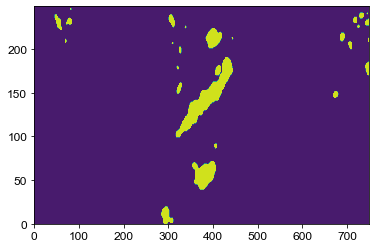

In [26]:
#Do similar things with scikit-learn package
img_binary    = (precip_usa>=1)
img_binary    = img_binary.astype(np.uint16) 
img_label     = skmeasure.label(img_binary)
#Visualize blobs
plt.contourf(img_binary>0)

#Get obj_ids
obj_ids       = np.unique(img_label)
obj_ids       = obj_ids[obj_ids>0]
print("Obj ids     :" + str(obj_ids) )


area   :[ 30690 111320   1980 273130   5500   7040  10010   9460    770   2530
   4290  55000    220    660    770   7040    220  12870    330    770
  10670   5170   5610   3960   4620    220    110]
precip volume :[6.61478223e+04 5.22789837e+05 2.46057216e+03 1.09769555e+06
 6.71291125e+03 9.90937592e+03 1.58634495e+04 2.02600989e+04
 8.23707646e+02 3.07696638e+03 5.35883065e+03 2.26309462e+05
 2.24839334e+02 6.84667168e+02 8.71193596e+02 1.19979257e+04
 2.23002908e+02 1.72946025e+04 3.40390509e+02 8.20762527e+02
 1.79901885e+04 8.02821667e+03 7.58084450e+03 5.90918146e+03
 7.13536196e+03 2.27539148e+02 1.11568396e+02]
precip max    :[ 4.6763005 16.011404   1.6169466 14.575311   1.4663831  1.9526702
  2.3581285  4.0495677  1.1338166  1.4413172  1.5465162 10.669378
  1.0267298  1.0821149  1.2627861  2.682251   1.0140047  2.0408826
  1.0543404  1.1679933  2.7575128  2.0961888  2.0090766  2.163685
  2.3292894  1.0463961  1.0142581]
lat-width     :[1.9 3.1 0.4 9.  0.6 1.1 1.  1.4 0.2 0.6

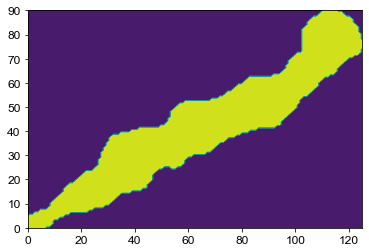

In [29]:
#Extract properties using regions

regions        = skmeasure.regionprops(img_label,precip_usa)

pixel_count    = np.array([ r.area for r in regions])
area           = pixel_count  * 110 #pixel area
print("area   :" + str(area))

precip_mean    = np.array([ r.mean_intensity for r in regions])
precip_vol     = precip_mean * pixel_count * 110     
print("precip volume :" + str(precip_vol))

precip_max     = np.array([ r.max_intensity for r in regions])
print("precip max    :" + str(precip_max))
 
regions        = skmeasure.regionprops(img_label,latmesh_usa)
lat_max        = np.array([ r.max_intensity for r in regions])
lat_min        = np.array([ r.min_intensity for r in regions])
centroid_lat   = np.array([ r.mean_intensity for r in regions])
regions        = skmeasure.regionprops(img_label,lonmesh_usa)
lon_max        = np.array([ r.max_intensity for r in regions])
lon_min        = np.array([ r.min_intensity for r in regions])
centroid_lon   = np.array([ r.mean_intensity for r in regions])

lat_width      = np.abs(lat_max-lat_min)
lon_width      = np.abs(lon_max-lon_min)
print("lat-width     :" + str(lat_width))
print("lon-width     :" + str(lon_width))
print("centroid_lat   :" + str(centroid_lat))
print("centroid_lon   :" + str(centroid_lon))

regions        = skmeasure.regionprops(img_label,precip_usa)
r5_intensity   = regions[3].intensity_image
print("shape of bounding box: " + str(np.shape(r5_intensity)))
#Visualize the bounding box with only this blob region.
#Other blobs in the same bounding box are removed. which is great 
plt.contourf(r5_intensity>=1)

pctls          = np.array([10,25,50,75,90]) 
pctl_val       = np.array([ np.percentile(r.intensity_image[r.intensity_image>=1],pctls) for r in regions])
print("Box and Whisker percentiles:\n " )


In [ ]:
# regions is a more useful package. 
# Following are some of the function not available in labeled comprehension

perimeter      =  np.array([ r.perimeter for r in regions ])
print("Perimeter : " + str(perimeter))

major_axis     = np.array([r.major_axis_length for r in regions])
minor_axis     = np.array([r.minor_axis_length for r in regions])
print("major_axis: " + str(major_axis))
print("minor_axis: " + str(minor_axis))

Freq: [   0   12   45  160  425  912 1500 1906 1932 1534  887  458  163   50
   13    0]


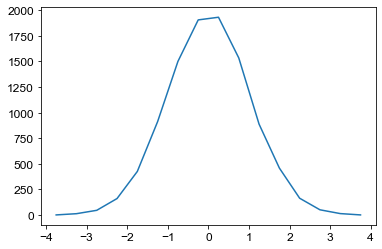

In [30]:
#labeled comprehension on 1D data
val        = np.random.normal(loc=0,scale=1.0,size=10000)
bin_edges  = np.arange(-4,4.1,0.5)
bin_center = (bin_edges[0:-1] + bin_edges[1:])/2.0

label_1D   = np.digitize(val,bin_edges)
bin_ids    = np.arange(1,len(bin_edges))
freq       = ndimage.labeled_comprehension(label_1D,label_1D,bin_ids,np.count_nonzero,np.uint16,0)
print("Freq: " + str(freq))
plt.plot(bin_center,freq)